### Paradigmas de aprendizaje: supervisadom no supervisado y por refuerzo

#### Análisis de componentes principales

Algoritmo que reduce la dimensión de las variables manteniendo la mayor cantidad de información posible (varianza). Se pasa de muchas variabes correlacionadas, con información redundante, a un número de variabels reducido, incorreladas.

Se pueden construir tantas componentes principaes (PCs) como variables originales (siempre y cuando no haya alguna variable que sea una combinación lineal exacte del otras), pero no tiene sentido mantenerlas todas, ya que se quiere reducir la dimensión. Para decidir cuantas PCs se ,antienen, se calcula el porcentaje de la varianza de los datos orginiales que se acumula con cada PC (que estarán ordenadas de mayor a menor varianza).

Las PCs son simplemente combinaciones lineales de las variables originales.

Es posible construir una explicación de las nuevas variables, PCs, a partir de su correlación con las variables originales.

Restricciones:

* Se pierde explicabilidad respecto a las variables originales

Parámetros:

* n_componentes: número de compontentes principales que se quieren mantener.

In [137]:
# Importar paquetes

import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing # Para estandarizar variables
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#### Carga de datos

Se cargan los datos desde un fichero csv.

Este fichero contiene información acerca de como se distribuyen los trabajadores de los países de la UE a lo largo de 8 distintos sectores (%): agricultura, minería, manufactura, energía, construcción, servicios, finanzas, social y transporte. El objetivo es reducir estas variables a sólo 2 o 3, de tal manera que sea fácil ilustrar la información. Intuitivamente, esas nuevas variables podrían estar relacionadas con la división en sectores primario, secundario y terciario.

In [139]:
data = pd.read_csv("C:/Users/pauri/OneDrive/Escritorio/Python projects/CUA Big Data/eurojob (1).csv", sep=";")
data

,Country,Agr,Min,Man,Pow,Con,Ser,Fin,Soc,Tra
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,WGerm,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1
5,Italy,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7
6,Luxem,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2
7,Nether,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8
8,UK,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4
9,Austria,12.7,1.1,30.2,1.4,9.0,16.8,4.9,16.8,7.0


In [140]:
# Ponemos como indice los nombres de los países

data.set_index("Country",inplace=True)
data.head()

,Agr,Min,Man,Pow,Con,Ser,Fin,Soc,Tra
Country,,,,,,,,,
Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
WGerm,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1


#### Descripción y visualización de los datos

In [142]:
# Descriptivos de las variables
data.describe()

,Agr,Min,Man,Pow,Con,Ser,Fin,Soc,Tra
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,19.130769,1.253846,27.007692,0.907692,8.165385,12.957692,4.000000,20.023077,6.546154
std,15.546569,0.970044,7.007763,0.376216,1.645586,4.575253,2.806564,6.829542,1.391469
min,2.700000,0.100000,7.900000,0.100000,2.800000,5.200000,0.500000,5.300000,3.200000
25%,7.700000,0.525000,23.000000,0.600000,7.525000,9.250000,1.225000,16.250000,5.700000
50%,14.450000,0.950000,27.550000,0.850000,8.350000,14.400000,4.650000,19.650000,6.700000
75%,23.675000,1.800000,30.200000,1.175000,8.975000,16.875000,5.925000,24.125000,7.075000
max,66.800000,3.100000,41.200000,1.900000,11.500000,19.100000,11.300000,32.400000,9.400000


In [143]:
# Correlación de las variables
data.corr()

,Agr,Min,Man,Pow,Con,Ser,Fin,Soc,Tra
Agr,1.000000,0.035799,-0.671098,-0.400051,-0.538325,-0.736981,-0.219836,-0.746790,-0.564920
Min,0.035799,1.000000,0.445196,0.405455,-0.025598,-0.396565,-0.442683,-0.281012,0.156629
Man,-0.671098,0.445196,1.000000,0.385346,0.494479,0.203826,-0.155829,0.154171,0.350692
Pow,-0.400051,0.405455,0.385346,1.000000,0.059889,0.201907,0.109862,0.132411,0.375231
Con,-0.538325,-0.025598,0.494479,0.059889,1.000000,0.356022,0.016283,0.158243,0.387662
Ser,-0.736981,-0.396565,0.203826,0.201907,0.356022,1.000000,0.365555,0.572173,0.187554
Fin,-0.219836,-0.442683,-0.155829,0.109862,0.016283,0.365555,1.000000,0.107640,-0.245926
Soc,-0.746790,-0.281012,0.154171,0.132411,0.158243,0.572173,0.107640,1.000000,0.567867
Tra,-0.564920,0.156629,0.350692,0.375231,0.387662,0.187554,-0.245926,0.567867,1.000000


<Axes: >

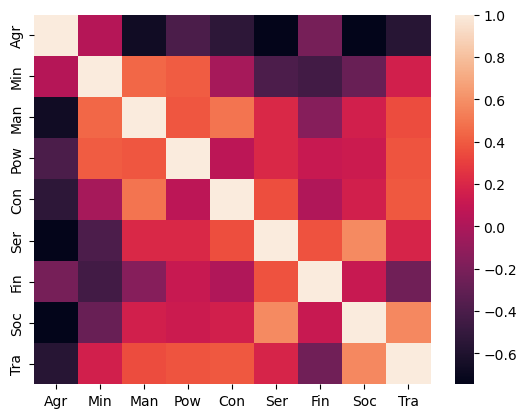

In [144]:
# Mapa de correlaciones de las variables
sns.heatmap(data.corr())

C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

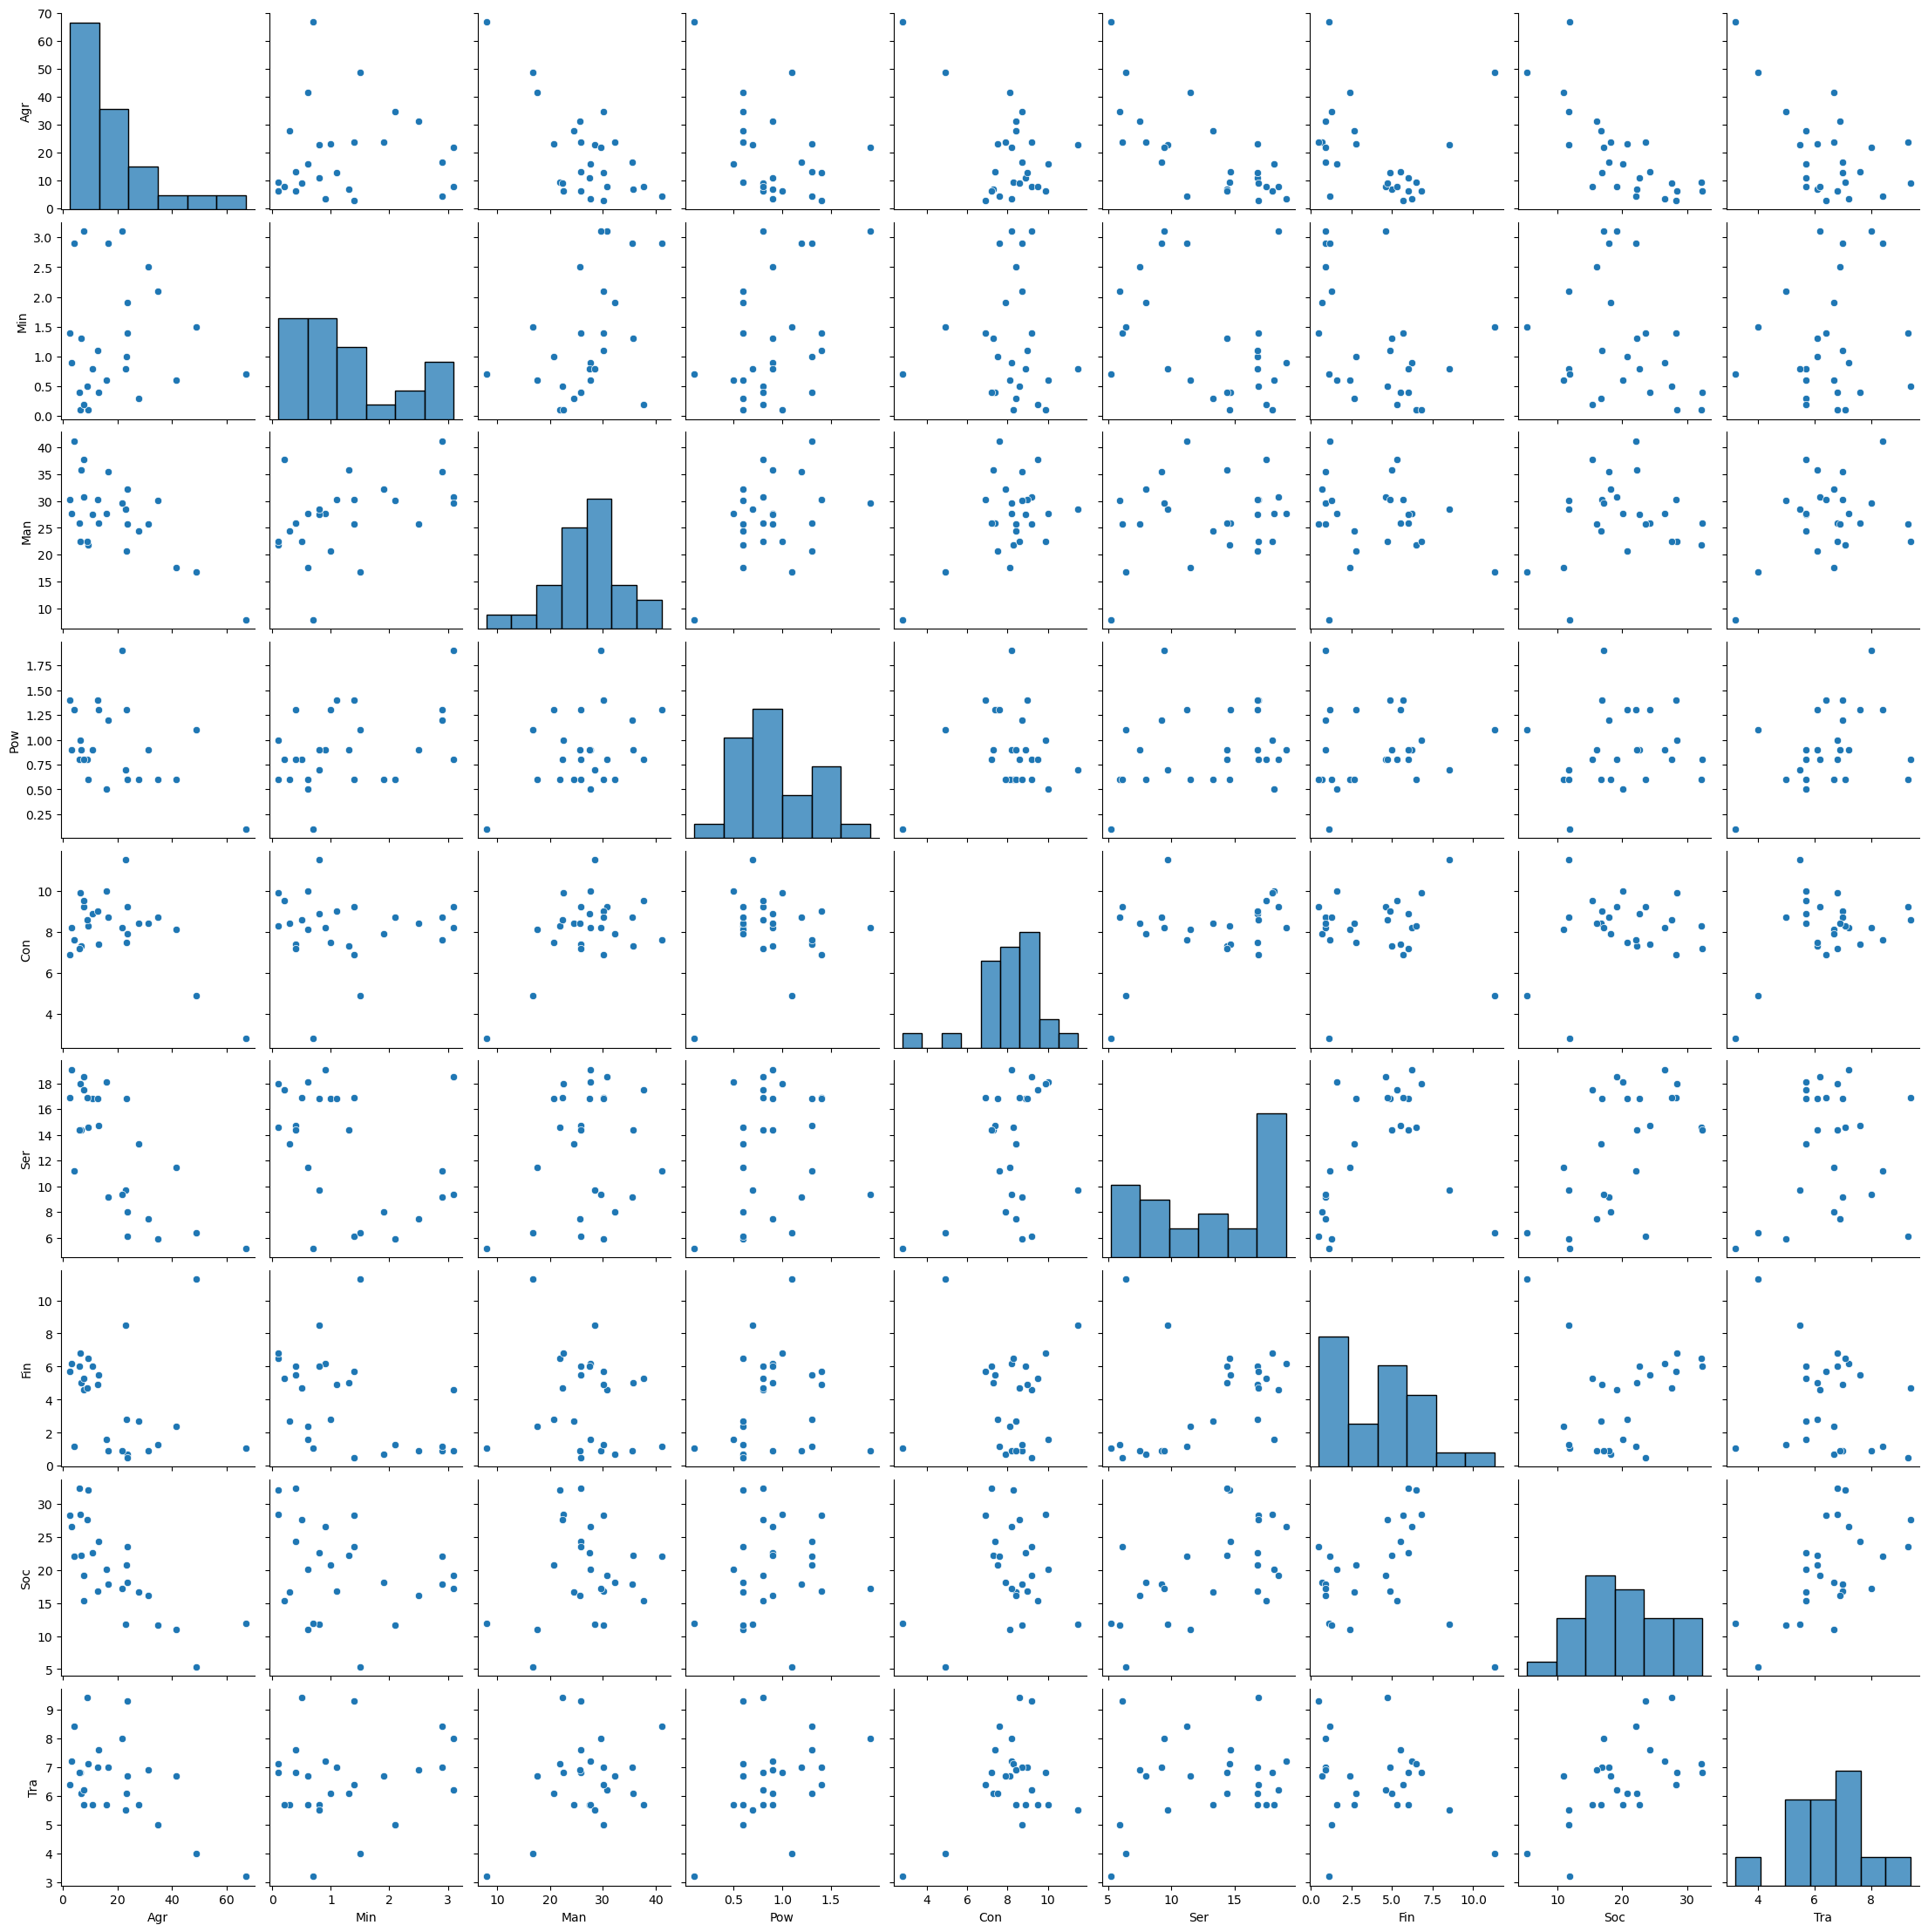

In [145]:
# Grafico bivariante de las variables
sns.pairplot(data)

En la diagonal aparecen los histogramas y en el resto de gráficos los scatterplots de los ares de variables correspondientes.

Se observa que existen correlaciones altas enre algunas variables y por tanto tiene sentido hablar de reducir la información redundante: reducir el número de variables manteniendo la mayor cantidad de información (varianza) posible.

#### Construcción de los componentes principales

Obtenemos las componentes principales (inicialmente 9, como el número de variables originales).

In [148]:
pca = PCA(n_components=9)
pca.fit(data).transform(data)

array([[-1.75166869e+01,  4.92622849e+00, -2.35528094e+00,
        -1.94000687e-01,  4.90727452e-01,  5.87256317e-01,
        -2.74786178e-02,  2.61512512e-01, -8.04079521e-03],
       [-1.14966878e+01,  1.16617664e+01,  3.00202830e+00,
         2.53285642e+00, -2.62050345e-01, -1.00014269e+00,
         1.61850514e-01,  1.13221471e-01,  9.81778319e-02],
       [-9.12868605e+00,  2.16828207e+00, -2.75030568e+00,
         1.28918271e-01,  3.73558694e-01, -7.40620396e-01,
         4.48554214e-01, -7.20032493e-02, -2.82246847e-03],
       [-1.43934235e+01, -5.04749385e+00,  2.05689514e-01,
         1.21437286e+00,  2.57857191e+00, -2.61240478e-01,
        -3.82502684e-01,  1.14442694e-01, -4.39574579e-02],
       [ 4.45817382e+00,  6.13156498e+00, -1.92400082e+00,
        -3.48090600e+00,  3.48059063e-01,  5.39897170e-01,
         3.57506102e-01, -4.20871836e-01,  7.22905980e-02],
       [-4.02668420e+00,  3.88895293e-01, -2.40586194e+00,
        -4.81006251e+00, -2.46939439e-01, -1.502067

La salida del algoritmo es una tabla en la que tenemos las observaciones originales, pero se han sustitudio las variables originales por las componentes principales (es decir, por los valores de las observaciones en esas PCs).

In [150]:
pca.explained_variance_ratio_

array([8.15783578e-01, 1.17482748e-01, 4.08817874e-02, 1.51602379e-02,
       6.56856714e-03, 2.81204052e-03, 1.13135967e-03, 1.74541717e-04,
       5.13996042e-06])

Se observa que una única PC caputura el 81,57% (la primera) de la varianza de los datos originales. Al no estar las variables originales estandarizadas, cada una tiene una varianza disntinta, por lo que esta métrica está distorsionada por le hecho de no estar las variables originales estandarizadas. Repetimos el proceso estandarizando las variables originales.

In [152]:
data_std= preprocessing.scale(data)
data_std

array([[-1.03844649, -0.37199739,  0.08619551, -0.02085144,  0.02145187,
         1.3690936 ,  0.79940055,  0.9820822 ,  0.47920226],
       [-0.65142586, -1.21303495, -0.75784885, -0.83405766,  0.08342395,
         0.36606322,  0.90840971,  1.81828787,  0.40591251],
       [-0.54647111, -0.47712708,  0.07164302, -0.02085144,  0.4552564 ,
         0.85643363,  0.72672777,  0.38479244, -0.62014411],
       [-0.81541765,  0.0485214 ,  1.27949961, -0.02085144, -0.53629681,
         0.32148409,  0.36336389,  0.33999571, -0.32698507],
       [ 0.26692818, -0.26686769, -0.91792623,  1.06342351, -0.41235266,
         0.85643363, -0.43603666,  0.11601205, -0.32698507],
       [-0.21192785, -0.68738647,  0.08619551, -1.10512639,  1.13694923,
         1.14619796, -0.87207332,  0.01148634, -0.62014411],
       [-0.74982093,  1.94085592,  0.55187516, -0.29192018,  0.64117263,
         1.23535621,  0.21801833, -0.12290385, -0.25369532],
       [-0.84165634, -1.21303495, -0.65598143,  0.2502173 ,  1

In [153]:
type(data_std)

numpy.ndarray

Como tenemos un ndarray, debemos generar un nuevo DataFrame.

In [155]:
data_std_df=pd.DataFrame(data_std,index=data.index,columns=data.columns)
data_std_df

,Agr,Min,Man,Pow,Con,Ser,Fin,Soc,Tra
Country,,,,,,,,,
Belgium,-1.038446,-0.371997,0.086196,-0.020851,0.021452,1.369094,0.799401,0.982082,0.479202
Denmark,-0.651426,-1.213035,-0.757849,-0.834058,0.083424,0.366063,0.908410,1.818288,0.405913
France,-0.546471,-0.477127,0.071643,-0.020851,0.455256,0.856434,0.726728,0.384792,-0.620144
WGerm,-0.815418,0.048521,1.279500,-0.020851,-0.536297,0.321484,0.363364,0.339996,-0.326985
Ireland,0.266928,-0.266868,-0.917926,1.063424,-0.412353,0.856434,-0.436037,0.116012,-0.326985
Italy,-0.211928,-0.687386,0.086196,-1.105126,1.136949,1.146198,-0.872073,0.011486,-0.620144
Luxem,-0.749821,1.940856,0.551875,-0.291920,0.641173,1.235356,0.218018,-0.122904,-0.253695
Nether,-0.841656,-1.213035,-0.655981,0.250217,1.074977,1.123908,1.017419,1.265795,0.186043
UK,-1.077805,0.153651,0.464560,1.334492,-0.784185,0.878723,0.617719,1.235930,-0.107116


In [156]:
data_std_df.describe()

,Agr,Min,Man,Pow,Con,Ser,Fin,Soc,Tra
count,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01
mean,1.451830e-16,2.348549e-16,2.476651e-16,-3.031763e-16,8.369374e-16,1.537232e-16,3.416071e-17,-1.878839e-16,-4.697097e-16
std,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00
min,-1.077805e+00,-1.213035e+00,-2.780645e+00,-2.189401e+00,-3.325040e+00,-1.729156e+00,-1.271774e+00,-2.198486e+00,-2.452388e+00
25%,-7.498209e-01,-7.662337e-01,-5.832190e-01,-8.340577e-01,-3.968596e-01,-8.264284e-01,-1.008335e+00,-5.634051e-01,-6.201441e-01
50%,-3.070431e-01,-3.194325e-01,7.891927e-02,-1.563858e-01,1.144100e-01,3.214841e-01,2.361865e-01,-5.570876e-02,1.127535e-01
75%,2.980866e-01,5.741699e-01,4.645602e-01,7.245876e-01,5.017355e-01,8.731508e-01,6.994755e-01,6.125092e-01,3.875901e-01
max,3.126945e+00,1.940856e+00,2.065334e+00,2.689836e+00,2.066530e+00,1.369094e+00,2.652556e+00,1.848152e+00,2.091577e+00


In [157]:
pca = PCA(n_components=9)
pca.fit(data_std_df).transform(data_std_df)

array([[-1.71049775e+00, -1.22179120e+00,  1.14764763e-01,
        -3.39492013e-01, -3.24535687e-01, -4.72540889e-02,
         3.40087656e-01,  4.03035176e-01, -1.09040428e-03],
       [-9.52902209e-01, -2.12778495e+00, -9.50722162e-01,
        -5.93948931e-01,  1.02661108e-01, -8.27302278e-01,
         3.02922808e-01, -3.51835733e-01,  1.56187715e-02],
       [-7.54629546e-01, -1.12120754e+00,  4.97953700e-01,
         5.00329097e-01, -2.99718758e-01,  1.15807054e-01,
         1.85478024e-01, -2.66192438e-01, -5.07430715e-04],
       [-8.52552505e-01, -1.13765873e-02,  5.79526789e-01,
         1.10469840e-01, -1.16522683e+00, -6.18099387e-01,
        -4.44559232e-01,  1.94484110e-01, -6.53937174e-03],
       [ 1.03501768e-01, -4.13987173e-01,  3.84047875e-01,
        -9.26663957e-01,  1.52213291e-02,  1.42419990e+00,
         3.70428537e-02, -3.34038901e-01,  1.08793301e-02],
       [-3.75406515e-01, -7.69547385e-01, -1.06059786e+00,
         1.47723127e+00, -6.45182652e-01,  1.002104

In [158]:
pca.explained_variance_ratio_

array([3.87461252e-01, 2.36685905e-01, 1.22106401e-01, 1.10498109e-01,
       6.03575251e-02, 4.26030740e-02, 2.50837839e-02, 1.51988806e-02,
       5.06945584e-06])

Ahora las varianzas explicadas por cada PC son más razonables. Observamos que la primera explica un 38,7%, la segunda un 23,67%, la tercera un 12,21% y la cuarta un 11,05%.

El número de PCs que se mantienen depende en parte del contexto y objetivo del análisis (subjetivo), así como del incremento marginal de varianza al introducir una nueva PC (objetivo).

Text(0.5, 1.0, 'Varianza explicada y varianza explicada acumulada por PC')

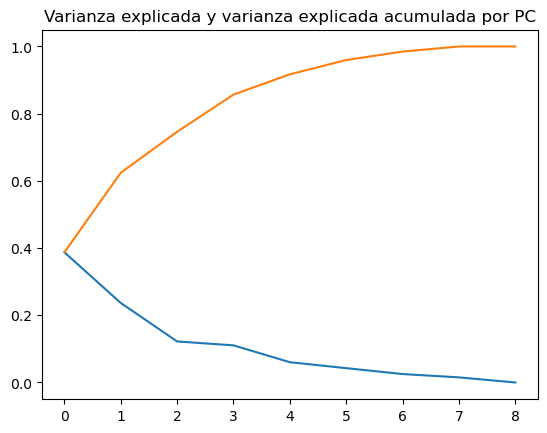

In [160]:
plt.plot(range(9),pca.explained_variance_ratio_)
plt.plot(range(9),np.cumsum(pca.explained_variance_ratio_))
plt.title("Varianza explicada y varianza explicada acumulada por PC")

En nuestro caso, como queremos ilustrarlas, se mantienen únicamente dos componetes principales.

In [162]:
pca = PCA(n_components=2)
pca.fit(data_std_df).transform(data_std_df)

array([[-1.71049775, -1.2217912 ],
       [-0.95290221, -2.12778495],
       [-0.75462955, -1.12120754],
       [-0.85255251, -0.01137659],
       [ 0.10350177, -0.41398717],
       [-0.37540652, -0.76954739],
       [-1.05944243,  0.75582714],
       [-1.68821703, -2.00484484],
       [-1.63044908, -0.37312967],
       [-1.17644844,  0.14310057],
       [-0.99193998, -0.7483052 ],
       [ 2.11340524, -0.35346119],
       [-1.68649634, -1.07571654],
       [ 1.01529291, -0.75704504],
       [ 0.43586224, -0.61633811],
       [-1.08380468, -1.57852344],
       [-1.05812823, -0.74239113],
       [ 6.34754005, -1.06614485],
       [ 0.72560008,  1.496766  ],
       [-0.42594972,  2.66455632],
       [-1.78082611,  2.8150226 ],
       [-0.57834424,  3.14344517],
       [ 1.11371232,  1.90524725],
       [ 2.05150036,  1.60503176],
       [-0.05043509,  1.26653254],
       [ 3.95005493, -0.8139345 ]])

Ahora, esa matriz de datos tiene únicamente dos variables (PCs) y mantiene las 26 observaciones originales.

In [164]:
pca.explained_variance_ratio_

array([0.38746125, 0.2366859 ])

In [165]:
# Graficamos las dos PCs

df_pca=pd.DataFrame(pca.fit(data_std_df).transform(data_std_df))

df_pca.index= data.index

df_pca

,0,1
Country,,
Belgium,-1.710498,-1.221791
Denmark,-0.952902,-2.127785
France,-0.754630,-1.121208
WGerm,-0.852553,-0.011377
Ireland,0.103502,-0.413987
Italy,-0.375407,-0.769547
Luxem,-1.059442,0.755827
Nether,-1.688217,-2.004845
UK,-1.630449,-0.373130


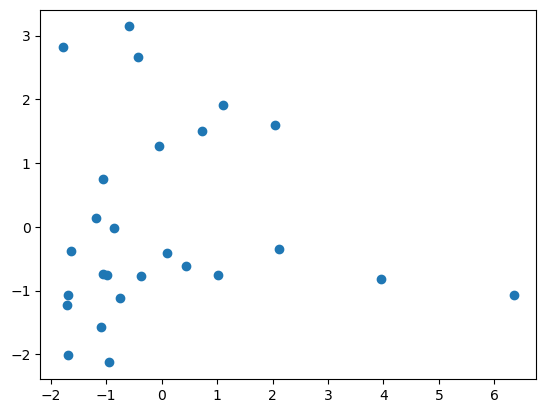

In [166]:
plt.scatter(df_pca[0],df_pca[1])

Las varibales estan incorreladas

In [168]:
df_pca.corr()

,0,1
0,1.000000e+00,2.820113e-16
1,2.820113e-16,1.000000e+00


C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


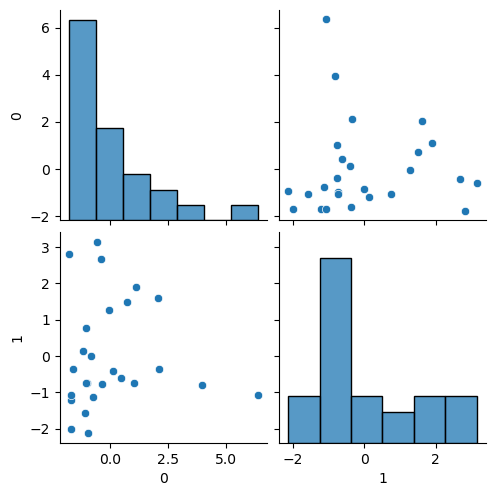

In [169]:
# Gráfico bivariante

sns.pairplot(df_pca)

Por último, nos interesa obtener la información lineal que define a las PCs, y la correlación entre las PCs y las variables originales, de cara a poder dar una interpretación

In [171]:
pca.components_

array([[ 0.52379099,  0.00132346, -0.34749513, -0.25571618, -0.32517932,
        -0.37891966, -0.07437358, -0.38740881, -0.36682271],
       [ 0.05359389,  0.61780714,  0.3550536 ,  0.26109606,  0.05128845,
        -0.35017206, -0.45369785, -0.2215212 ,  0.20259185]])

Es decir:

$PC_1=0.52379·Agr_{std}+0.00132·Min_{std}-0.3475·Man_{std}-0.25572·Pow_{std}-0.32518·Con_{std}-0.37892·Ser_{std}-0.07437·Fin_{std}-0.38741·Soc_{std}-0.36682·Tra_{std}$

Para obtener las correlaciones, basta con multiplicar estos pesos entre la raíz de la varianza de cada PC (que es el porcentaje explicado de la varianza original por el número de variables):

In [178]:
pca.components_[0]*((0.38746125*9)**0.5)

array([ 0.97812287,  0.00247141, -0.64890948, -0.47752224, -0.60723712,
       -0.70759138, -0.1388846 , -0.72344394, -0.68500164])

In [176]:
pca.components_[1]*((0.2366859*9)**0.5)

array([ 0.07822089,  0.90169647,  0.51820473,  0.38107264,  0.07485607,
       -0.51108007, -0.66217712, -0.32331269,  0.29568509])

* La primera PC separa países con economías agrícolas (mayores valores para PC1) de países con economías industriales (menores valores para PC1). La correlación de la primera variable (agriculutra) es del 97,8%
* La segunda PC está positivamente correlacionada con Min, Man, Pow y Tra, y negativamente con Ser, Fin y Soc, por lo que está separando países con un amplio sector servicios (menor PC2) de los que tienen un menor sector servicios (mayor PC2). 